In [72]:
import os
import numpy as np
import pandas as pd

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

def vsmape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * smap
    

In [74]:
subs = []
scores = []
for f in os.listdir('final_sub'):
    print('final_sub/'+f)
    if '.csv' in f:
        # scores.append(1/(float(f[:5])-13720))
        df = pd.read_csv('final_sub/'+f)
        subs.append(df)
# scores = np.array(scores)
# scores /= np.sum(scores)

scores = [1/4,1/2,1/4]
print(scores,sum(scores))

for i in range(len(subs)):
    for j in range(i+1,len(subs)):
        print(smape(subs[i].microbusiness_density,subs[j].microbusiness_density))

final_sub/0.csv
final_sub/.DS_Store
final_sub/1.csv
final_sub/3.csv
[0.25, 0.5, 0.25] 1.0
0.03947934475965739
0.033909863908165624
0.013160612476369711


In [75]:
test = pd.read_csv('sub/13724.csv')
# test = pd.concat(subs,axis=0).groupby('row_id').mean().reset_index()
test.microbusiness_density = sum([subs[i].microbusiness_density.values * scores[i] for i in range(len(subs))])

test['cfips'] = test['row_id'].map(lambda x: int(x.split('_')[0]))

column_names = ['GEO_ID','NAME','S0101_C01_026E']
df2021 = pd.read_csv('data/ACSST5Y2021.S0101-Data.csv', usecols=column_names)
df2021 = df2021.iloc[1:]
df2021['S0101_C01_026E'] = df2021['S0101_C01_026E'].astype('int')
df2021['cfips'] = df2021.GEO_ID.apply(lambda x: int(x.split('US')[-1]))
adult2021 = df2021.set_index('cfips').S0101_C01_026E.to_dict()

test['adult2021'] = test['cfips'].map(adult2021)

# rounding to the nearest integer
test['microbusiness_density'] = (
    np.round(test['microbusiness_density'] * test['adult2021'] / 100) / test['adult2021'] * 100
)
for i in range(3):
    print(smape(test.microbusiness_density,subs[i].microbusiness_density))

subs[0].microbusiness_density = test.microbusiness_density
subs[0].to_csv('merge_submission.csv',index=False)

baseline = pd.read_csv('final_submission.csv')
smape(subs[0].microbusiness_density.values,baseline.microbusiness_density.values)

0.09794208718832886
0.07664517290159129
0.07676113488018639


/var/folders/y4/9bc9208j79x5x1q7xs1g71kc0000gn/T/ipykernel_69031/1251963160.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021 = pd.read_csv('data/ACSST5Y2021.S0101-Data.csv', usecols=column_names)


0.09794208718832886

<AxesSubplot:>

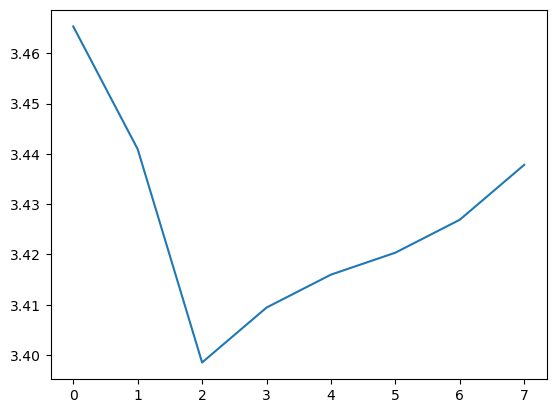

In [76]:
import seaborn as sns

sns.lineplot(baseline[baseline.row_id.str.contains('55021')].microbusiness_density.values)

In [77]:
subs[0].microbusiness_density,baseline.microbusiness_density

(0        3.442999
 1        3.470003
 2        3.337234
 3        3.350736
 4        3.361987
            ...   
 25075    1.836698
 25076    1.836698
 25077    1.836698
 25078    1.836698
 25079    1.836698
 Name: microbusiness_density, Length: 25080, dtype: float64,
 0        3.442677
 1        3.470915
 2        3.337234
 3        3.348486
 4        3.359737
            ...   
 25075    1.836698
 25076    1.836698
 25077    1.836698
 25078    1.836698
 25079    1.836698
 Name: microbusiness_density, Length: 25080, dtype: float64)

In [78]:
pd.concat([subs[0],baseline],axis=1)

,row_id,microbusiness_density,row_id,microbusiness_density
0,1001_2022-11-01,3.442999,1001_2022-11-01,3.442677
1,1001_2022-12-01,3.470003,1001_2022-12-01,3.470915
2,1001_2023-01-01,3.337234,1001_2023-01-01,3.337234
3,1001_2023-02-01,3.350736,1001_2023-02-01,3.348486
4,1001_2023-03-01,3.361987,1001_2023-03-01,3.359737
...,...,...,...,...
25075,56045_2023-02-01,1.836698,56045_2023-02-01,1.836698
25076,56045_2023-03-01,1.836698,56045_2023-03-01,1.836698
25077,56045_2023-04-01,1.836698,56045_2023-04-01,1.836698
25078,56045_2023-05-01,1.836698,56045_2023-05-01,1.836698


In [79]:
baseline = pd.read_csv('data/best_score_13724.csv')
baseline2 = pd.read_csv('merge_submission.csv')
smape(baseline2[baseline2.row_id.str.contains('2023-01-01')].microbusiness_density.values,baseline[baseline.row_id.str.contains('2023-01-01')].microbusiness_density.values)

0.012094437207247559

In [80]:
test

,row_id,microbusiness_density,cfips,adult2021
0,1001_2022-11-01,3.442999,1001,44438
1,1001_2022-12-01,3.470003,1001,44438
2,1001_2023-01-01,3.337234,1001,44438
3,1001_2023-02-01,3.350736,1001,44438
4,1001_2023-03-01,3.361987,1001,44438
...,...,...,...,...
25075,56045_2023-02-01,1.836698,56045,5499
25076,56045_2023-03-01,1.836698,56045,5499
25077,56045_2023-04-01,1.836698,56045,5499
25078,56045_2023-05-01,1.836698,56045,5499
